Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
First convolutional layer output shape: (1, 224, 224, 64)


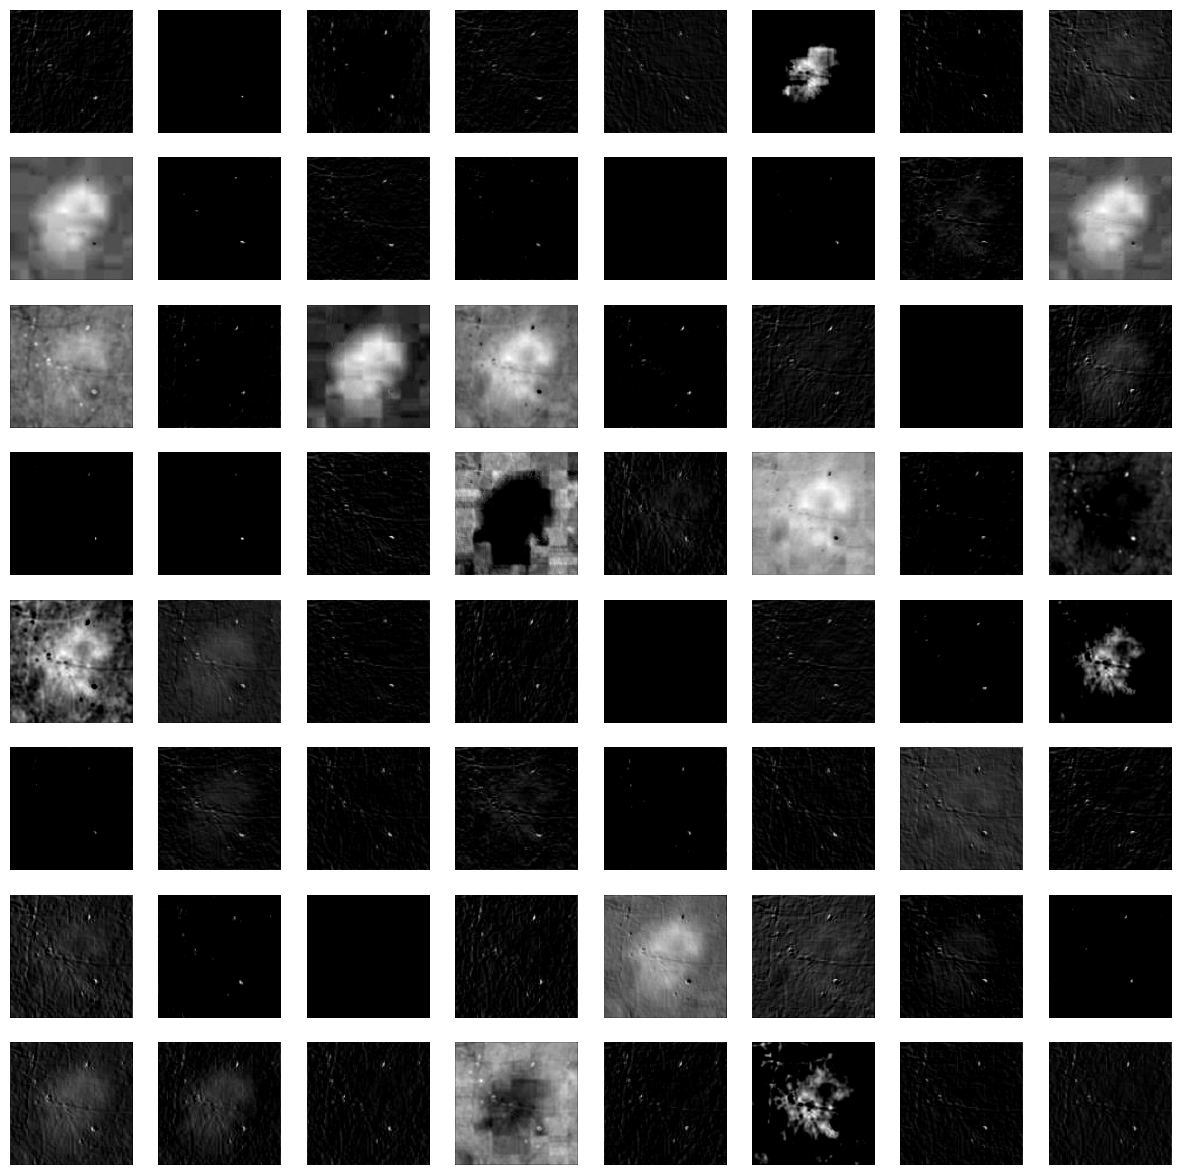

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/drive')
# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the features from the first convolutional layer
first_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)

# Load a sample image and preprocess it
img_path = '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_9996602.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

# Get the features from the first layer
first_layer_features = first_layer_model.predict(img_data)

# Print the dimensions of the first layer output
print(f"First convolutional layer output shape: {first_layer_features.shape}")

# Visualize the first layer features (feature maps)
n_features = first_layer_features.shape[-1]  # Number of feature maps
size = first_layer_features.shape[1]  # Height/Width of the feature maps

plt.figure(figsize=(15, 15))
for i in range(n_features):
    plt.subplot(8, 8, i + 1)
    plt.imshow(first_layer_features[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Layer 2 (block1_conv2): output shape (1, 224, 224, 64)
Layer 3 (block2_conv1): output shape (1, 112, 112, 128)
Layer 4 (block2_conv2): output shape (1, 112, 112, 128)
Layer 5 (block3_conv1): output shape (1, 56, 56, 256)


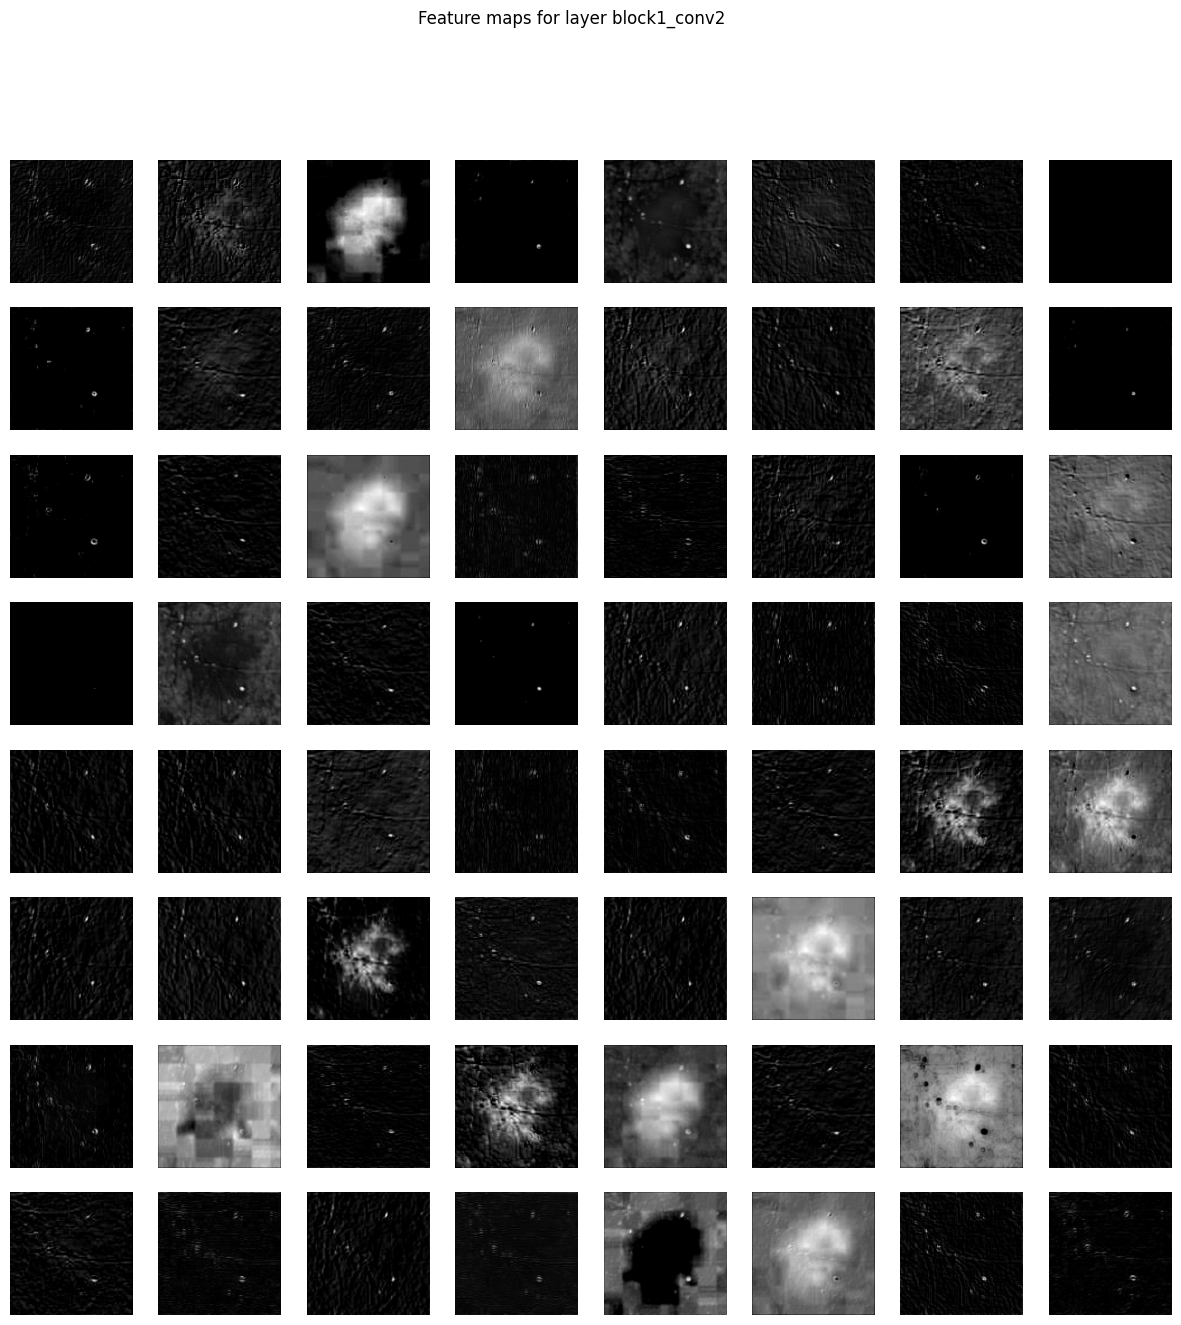

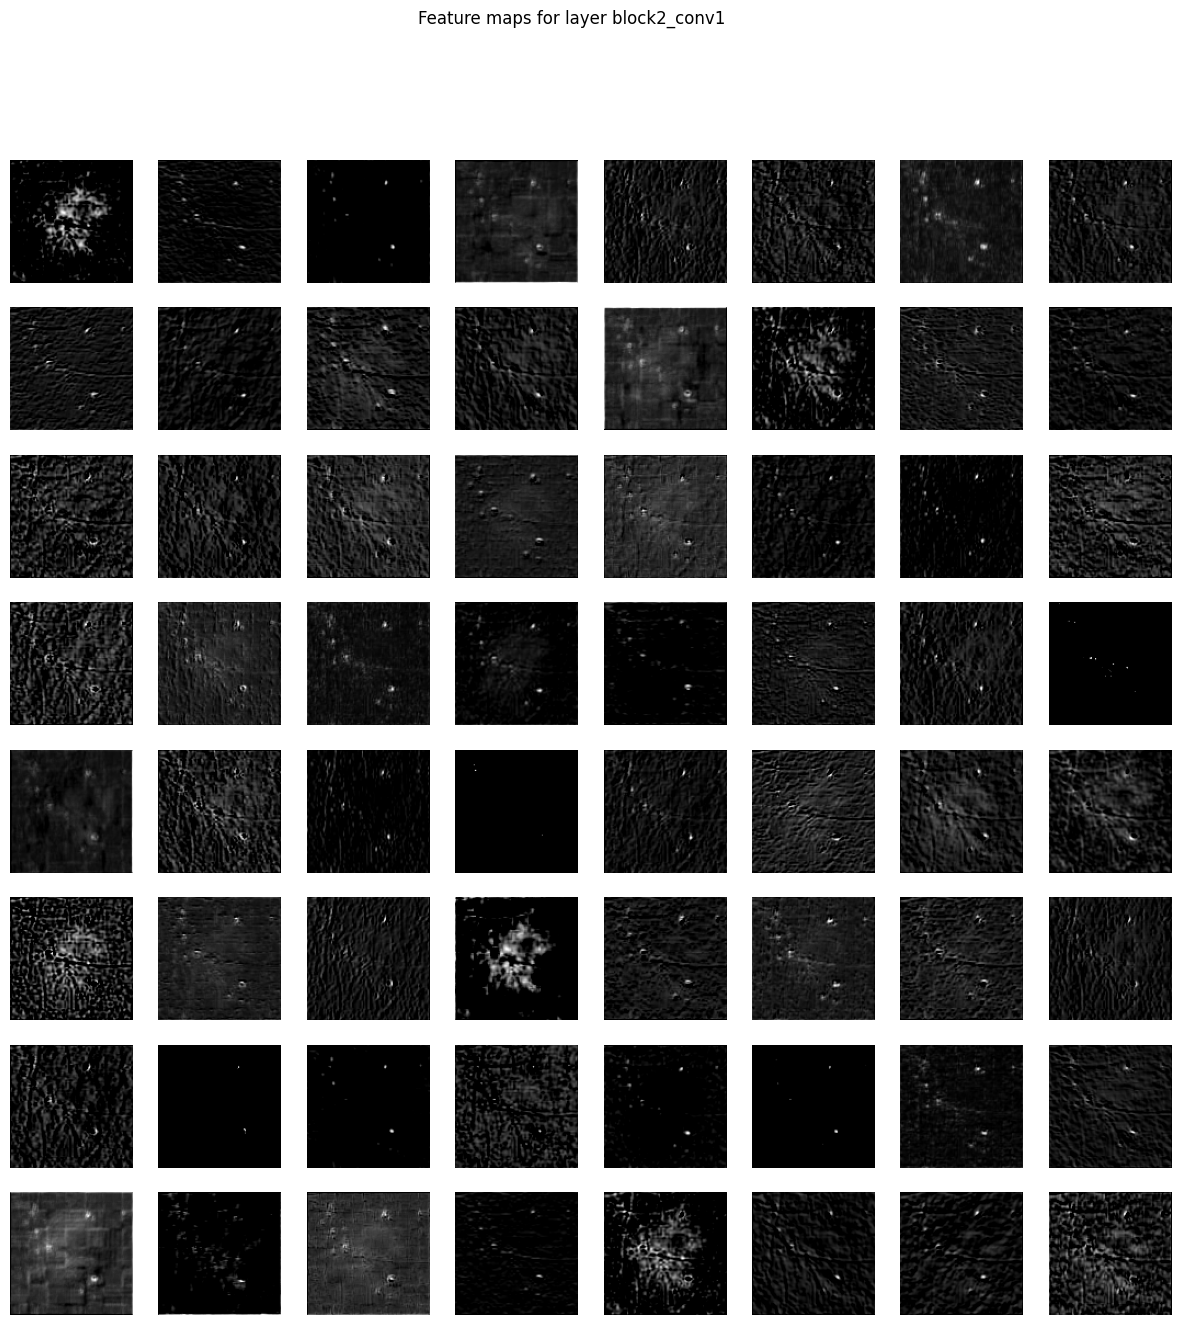

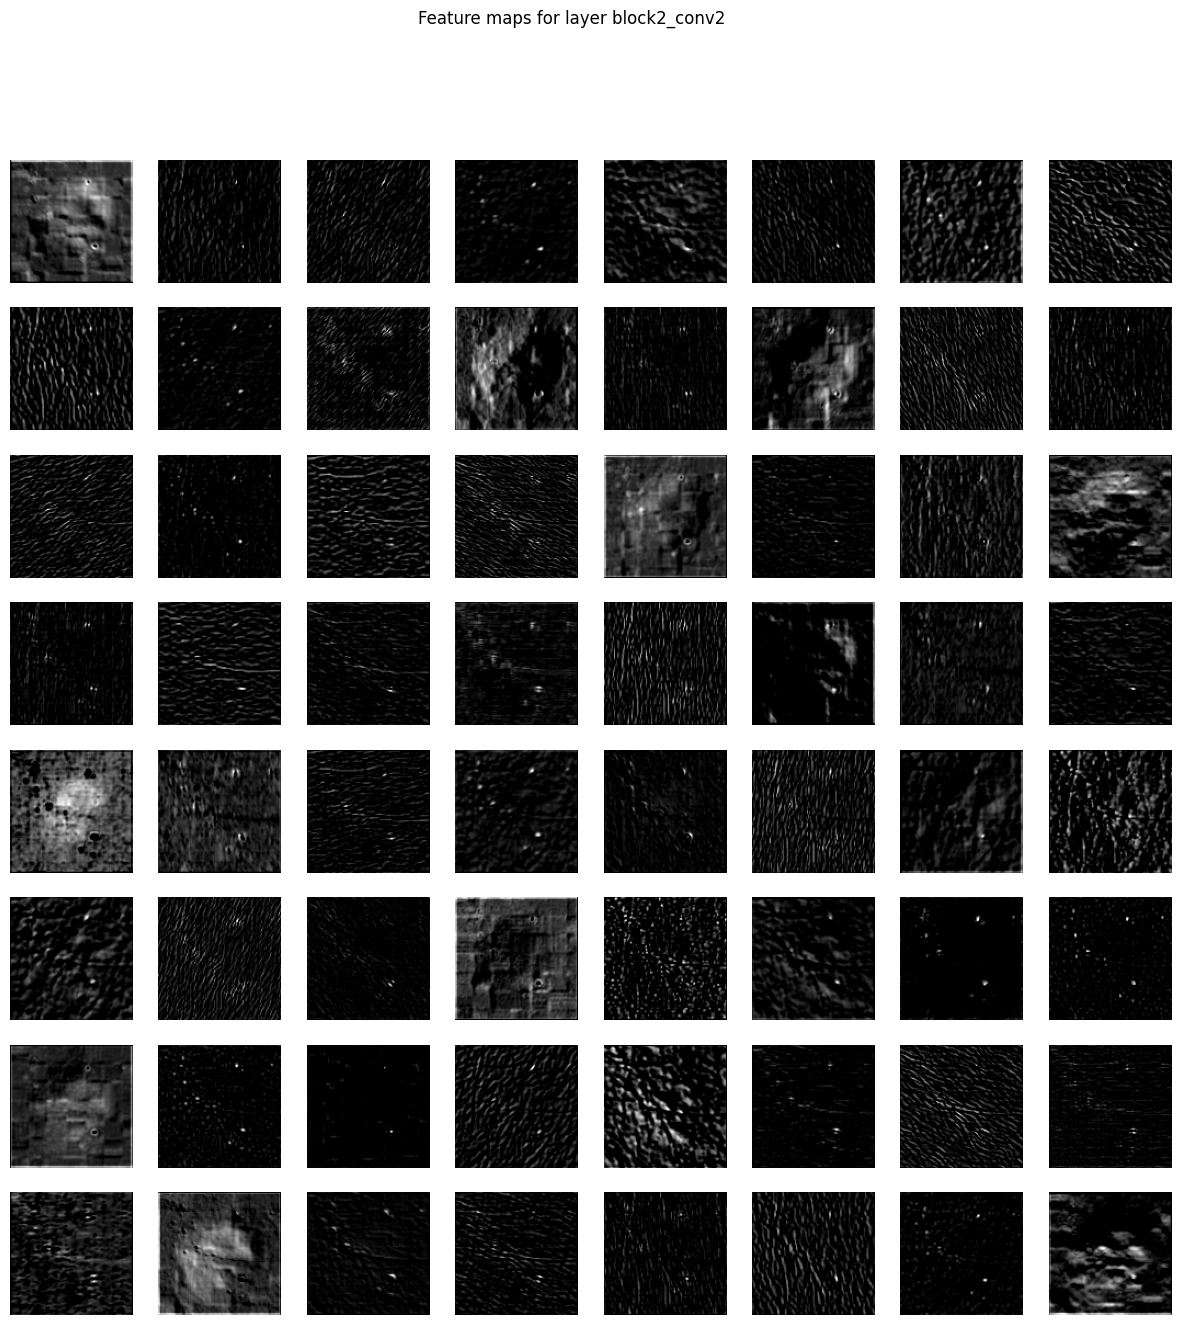

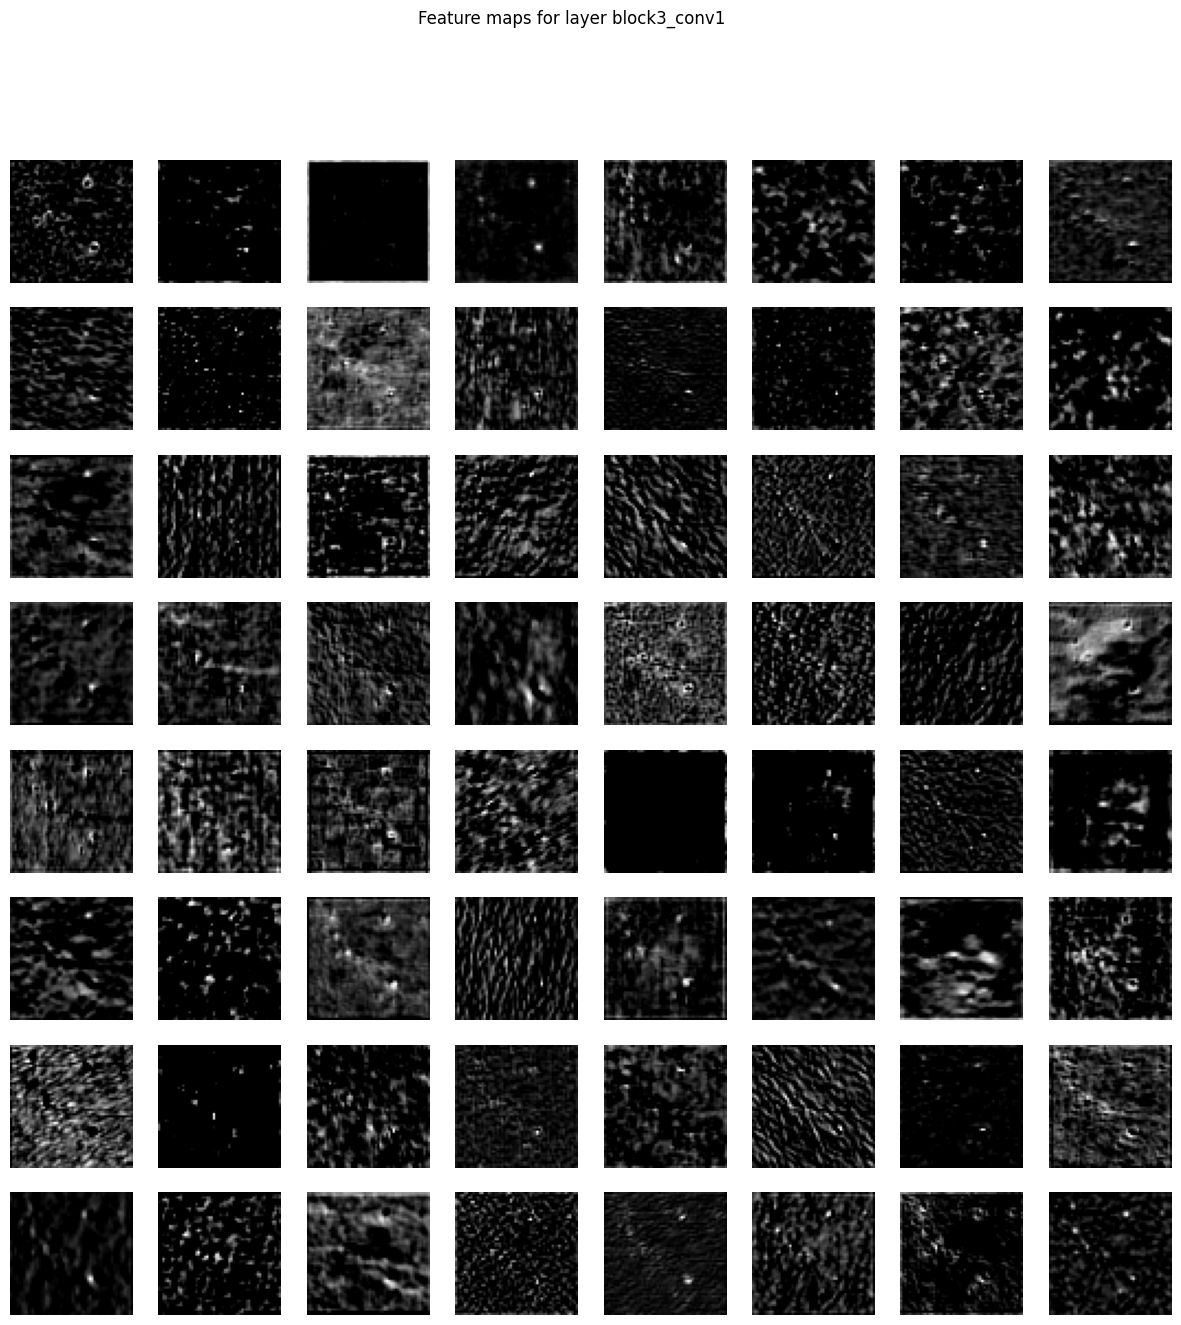

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# List of layer names for layers 2, 3, 4, 5
layer_names = ['block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1']

# Create a new model that outputs the features from the specified layers
layer_outputs = [model.get_layer(name).output for name in layer_names]
multi_layer_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Load a sample image and preprocess it
img_path = '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_9996602.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

# Get the features from the layers
layer_features = multi_layer_model.predict(img_data)

# Print the dimensions of each layer's output
for i, features in enumerate(layer_features):
    print(f"Layer {i+2} ({layer_names[i]}): output shape {features.shape}")

# Visualize the feature maps of each layer
for i, features in enumerate(layer_features):
    n_features = features.shape[-1]  # Number of feature maps
    size = features.shape[1]         # Height/Width of the feature maps

    plt.figure(figsize=(15, 15))
    plt.suptitle(f"Feature maps for layer {layer_names[i]}")

    for j in range(min(n_features, 64)):  # Plot at most 64 feature maps for visibility
        plt.subplot(8, 8, j + 1)
        plt.imshow(features[0, :, :, j], cmap='gray')
        plt.axis('off')

    plt.show()


In [ ]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
# import pandas as pd  # For saving to CSV
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Load the VGG16 model with pre-trained weights, without the fully connected layers
# model = VGG16(weights='imagenet', include_top=False)

# # Create a new model that outputs the features from the block5_conv2 layer
# conv5_2_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv2').output)

# # Define the paths to the image folders
# malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
# benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# # Function to load and preprocess a single image
# def preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_data = image.img_to_array(img)
#     img_data = np.expand_dims(img_data, axis=0)
#     return preprocess_input(img_data)

# # Get a list of image paths for malignant (393) and benign (400) images
# malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
# benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# # Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
# all_image_paths = malignant_image_paths + benign_image_paths
# labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# # Create an empty list to store the flattened features and their labels
# flattened_features = []

# # Process each image, extract the output of the block5_conv2 layer, flatten, and store features with labels
# for img_path, label in zip(all_image_paths, labels):
#     img_data = preprocess_image(img_path)  # Preprocess the image
#     conv5_2_layer_features = conv5_2_layer_model.predict(img_data)  # Get the conv5_2 layer features

#     # Flatten the feature map to 1D
#     flattened_feature = conv5_2_layer_features.flatten()

#     # Append the flattened features along with the label to the list
#     flattened_features.append(np.append(flattened_feature, label))
#     # size of flattened_features
#     #break





# # Convert the list of features and labels to a Pandas DataFrame
# feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
# df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# # Save the DataFrame to a CSV file
# output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'
# df.to_csv(output_file_path, index=False)

# print(f"Extracted features and labels saved to {output_file_path}")


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd  # For saving to CSV
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the features from the block5_conv2 layer
conv5_2_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv2').output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Process only the first image for dimension checking
first_img_path = all_image_paths[0]  # Change index for a different image
label = labels[0]

img_data = preprocess_image(first_img_path)  # Preprocess the image
conv5_2_layer_features = conv5_2_layer_model.predict(img_data)  # Get the conv5_2 layer features

# Print dimensions before flattening
print(f"Original feature map shape for image '{first_img_path}': {conv5_2_layer_features.shape}")

# Flatten the feature map to 1D
flattened_feature = conv5_2_layer_features.flatten()

# Print dimensions after flattening
print(f"Flattened feature shape for image '{first_img_path}': {flattened_feature.shape}")

# If you want to save the feature, you can do that here, but it's not included since you only want dimensions



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Original feature map shape for image '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_0082829.jpg': (1, 14, 14, 512)
Flattened feature shape for image '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_0082829.jpg': (100352,)


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file to analyze its dimensions and label distribution
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Get the dimensions of the DataFrame
rows, columns = df.shape

# Count the occurrences of each label
label_counts = df['label'].value_counts()

rows, columns, label_counts


KeyboardInterrupt: 

### block 5 conv2 (12th layer)


### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Mounted at /content/drive
Confusion Matrix:
[[75  9]
 [28 47]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.89      0.80        84
         1.0       0.84      0.63      0.72        75

    accuracy                           0.77       159
   macro avg       0.78      0.76      0.76       159
weighted avg       0.78      0.77      0.76       159

Accuracy: 0.7673


### Neural Networks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.5286 - loss: 8.7479 - val_accuracy: 0.6772 - val_loss: 5.4881
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7585 - loss: 7.9229 - val_accuracy: 0.7402 - val_loss: 5.9667
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7596 - loss: 5.3663 - val_accuracy: 0.7087 - val_loss: 7.3001
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8883 - loss: 2.7103 - val_accuracy: 0.7087 - val_loss: 9.6081
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9049 - loss: 1.4221 - val_accuracy: 0.6850 - val_loss: 7.5039
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9600 - loss: 0.5006 - val_accuracy: 0.7087 - val_loss: 8.4379
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9550 - loss: 2.1147 - val_accuracy: 0.7323 - val_loss: 9.2816
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9360 - loss: 1.5519 - val_accuracy: 0.7008 - 

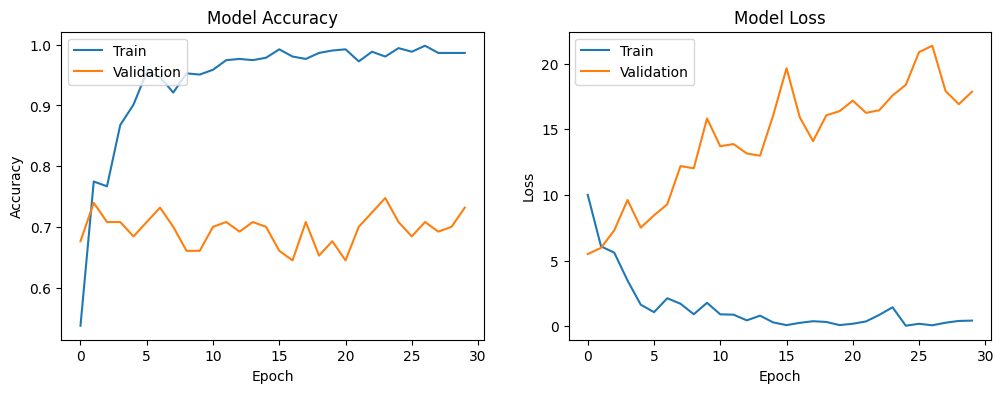

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Explicitly print the accuracy

# Optional: Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Random Forest


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Test Accuracy: 0.7547


### 10th layer block4_conv3

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd
from google.colab import drive
import gc  # Garbage collection

# Mount Google Drive
drive.mount('/content/drive')

# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the features from the block4_conv3 layer
conv4_3_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block4_conv3').output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Create an empty list to store the flattened features and their labels
flattened_features = []

# Set batch size
batch_size = 10  # Process 10 images at a time

# Process each image in batches
for i in range(0, len(all_image_paths), batch_size):
    batch_image_paths = all_image_paths[i:i + batch_size]
    batch_labels = labels[i:i + batch_size]

    for img_path, label in zip(batch_image_paths, batch_labels):
        img_data = preprocess_image(img_path)  # Preprocess the image
        conv4_3_layer_features = conv4_3_layer_model.predict(img_data)  # Get the block4_conv3 layer features

        # Flatten the feature map to 1D
        flattened_feature = conv4_3_layer_features.flatten()

        # Append the flattened features along with the label to the list
        flattened_features.append(np.append(flattened_feature, label))

    # Clear variables and collect garbage to free memory
    del batch_image_paths, batch_labels
    gc.collect()

# Convert the list of features and labels to a Pandas DataFrame
feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block4_conv3_features_with_labels.csv'
df.to_csv(output_file_path, index=False)

print(f"Extracted features and labels saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

### Block5_Conv1


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd
from google.colab import drive
import gc  # Garbage collection

# Mount Google Drive
drive.mount('/content/drive')

# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the features from the block5_conv1 layer (11th layer)
conv5_1_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv1').output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Create an empty list to store the flattened features and their labels
flattened_features = []

# Set batch size
batch_size = 10  # Process 10 images at a time

# Process each image in batches
for i in range(0, len(all_image_paths), batch_size):
    batch_image_paths = all_image_paths[i:i + batch_size]
    batch_labels = labels[i:i + batch_size]

    for img_path, label in zip(batch_image_paths, batch_labels):
        img_data = preprocess_image(img_path)  # Preprocess the image
        conv5_1_layer_features = conv5_1_layer_model.predict(img_data)  # Get the block5_conv1 layer features

        # Flatten the feature map to 1D
        flattened_feature = conv5_1_layer_features.flatten()

        # Append the flattened features along with the label to the list
        flattened_features.append(np.append(flattened_feature, label))

    # Clear variables and collect garbage to free memory
    del batch_image_paths, batch_labels
    gc.collect()

# Convert the list of features and labels to a Pandas DataFrame
feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv1_features_with_labels.csv'
df.to_csv(output_file_path, index=False)

print(f"Extracted features and labels saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

### SVM for BLOCK5_CONV1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv1_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
[[74 10]
 [25 50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81        84
         1.0       0.83      0.67      0.74        75

    accuracy                           0.78       159
   macro avg       0.79      0.77      0.77       159
weighted avg       0.79      0.78      0.78       159

Accuracy: 0.7799


### Neural Network for BLOCK5_CONV1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.5654 - loss: 4.8205 - val_accuracy: 0.7323 - val_loss: 4.0130
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7735 - loss: 5.7884 - val_accuracy: 0.6850 - val_loss: 7.0580
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8059 - loss: 4.4133 - val_accuracy: 0.7087 - val_loss: 9.7367
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8953 - loss: 3.1379 - val_accuracy: 0.7323 - val_loss: 11.0658
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9175 - loss: 2.9699 - val_accuracy: 0.7165 - val_loss: 10.1928
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8707 - loss: 4.7412 - val_accuracy: 0.7323 - val_loss: 7.5852
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9621 - loss: 0.7227 - val_accuracy: 0.7008 - val_loss: 8.3789
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9573 - loss: 0.9870 - val_accuracy: 0.7638 

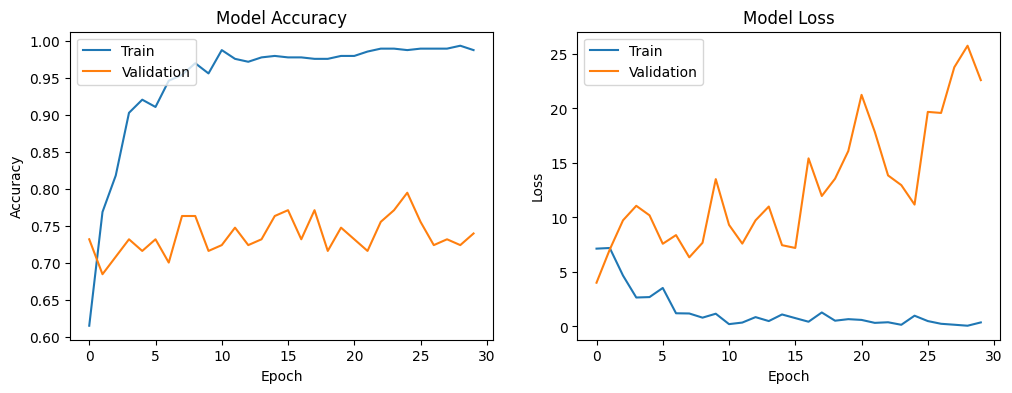

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv1_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Explicitly print the accuracy

# Optional: Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Random Forest for BLOCK5_CONV1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv1_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Test Accuracy: 0.7296


### BLOCK5_CONV3

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import pandas as pd
from google.colab import drive
import gc  # Garbage collection

# Mount Google Drive
drive.mount('/content/drive')

# Load the VGG16 model with pre-trained weights, without the fully connected layers
model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the features from the block5_conv3 layer (13th layer)
conv5_3_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv3').output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Create an empty list to store the flattened features and their labels
flattened_features = []

# Set batch size
batch_size = 10  # Process 10 images at a time

# Process each image in batches
for i in range(0, len(all_image_paths), batch_size):
    batch_image_paths = all_image_paths[i:i + batch_size]
    batch_labels = labels[i:i + batch_size]

    for img_path, label in zip(batch_image_paths, batch_labels):
        img_data = preprocess_image(img_path)  # Preprocess the image
        conv5_3_layer_features = conv5_3_layer_model.predict(img_data)  # Get the block5_conv3 layer features

        # Flatten the feature map to 1D
        flattened_feature = conv5_3_layer_features.flatten()

        # Append the flattened features along with the label to the list
        flattened_features.append(np.append(flattened_feature, label))

    # Clear variables and collect garbage to free memory
    del batch_image_paths, batch_labels
    gc.collect()

# Convert the list of features and labels to a Pandas DataFrame
feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv3_features_with_labels.csv'
df.to_csv(output_file_path, index=False)

print(f"Extracted features and labels saved to {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/s

### SVM BLOCK5_CONV3

In [ ]:
w

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
[[63 21]
 [40 35]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67        84
         1.0       0.62      0.47      0.53        75

    accuracy                           0.62       159
   macro avg       0.62      0.61      0.60       159
weighted avg       0.62      0.62      0.61       159

Accuracy: 0.6164


### NEURAL BLOCK5_CONV3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.5348 - loss: 6.4494 - val_accuracy: 0.5433 - val_loss: 5.4623
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7367 - loss: 3.3279 - val_accuracy: 0.6850 - val_loss: 9.7197
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8407 - loss: 2.2010 - val_accuracy: 0.6299 - val_loss: 9.3939
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8260 - loss: 1.5382 - val_accuracy: 0.7087 - val_loss: 10.7958
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9063 - loss: 1.2718 - val_accuracy: 0.7244 - val_loss: 18.3566
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9439 - loss: 1.1688 - val_accuracy: 0.7480 - val_loss: 17.3918
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9255 - loss: 0.6175 - val_accuracy: 0.7244 - val_loss: 14.6776
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9580 - loss: 0.4802 - val_accuracy: 0.661

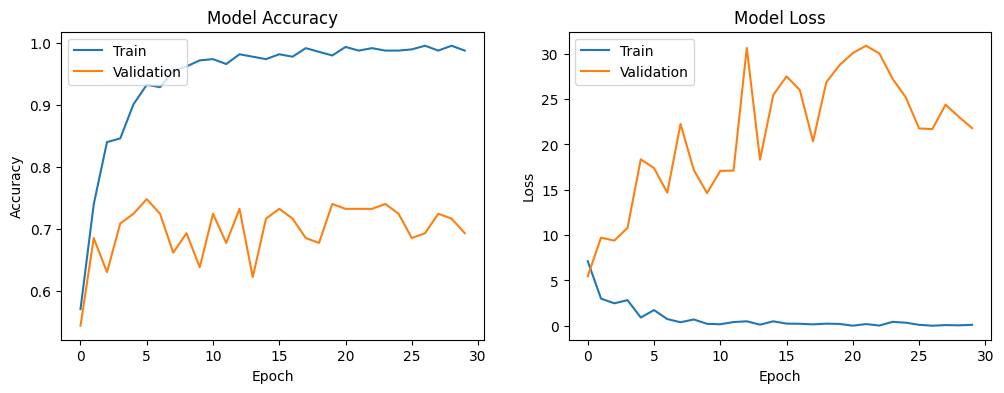

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv3_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Explicitly print the accuracy

# Optional: Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### RANDOM FOREST BLOCK5_CONV3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv3_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Test Accuracy: 0.7233


### RESNET CONV5_BLOCK2

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the ResNet50 model with pre-trained weights, without the fully connected layers
model = ResNet50(weights='imagenet', include_top=False)

# Specify the layer from which to extract features (recommended: 'conv4_block6_out')
layer_name = 'conv5_block2_out'  # This layer has output shape (14, 14, 1024) for better memory handling
resnet_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Create an empty list to store the flattened features and their labels
flattened_features = []

# Process each image, extract the output of the specified layer, flatten, and store features with labels
for img_path, label in zip(all_image_paths, labels):
    img_data = preprocess_image(img_path)  # Preprocess the image
    resnet_layer_features = resnet_layer_model.predict(img_data)  # Get the specified layer features

    # Flatten the feature map to 1D
    flattened_feature = resnet_layer_features.flatten()

    # Append the flattened features along with the label to the list
    flattened_features.append(np.append(flattened_feature, label))

# Convert the list of features and labels to a Pandas DataFrame
feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block2_out_features_with_labels.csv'
df.to_csv(output_file_path, index=False)

print(f"Extracted features and labels saved to {output_file_path}")


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the ResNet50 model with pre-trained weights, without the fully connected layers
model = ResNet50(weights='imagenet', include_top=False)

# Specify the layer from which to extract features
layer_name = 'conv5_block2_out'  # This layer has output shape (14, 14, 1024)
resnet_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Define the path to a single image (change this path to the specific image you want to process)
single_image_path = '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_0082829.jpg'  # Example path

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Process the single image, extract the output of the specified layer, flatten, and print dimensions
img_data = preprocess_image(single_image_path)  # Preprocess the image
resnet_layer_features = resnet_layer_model.predict(img_data)  # Get the specified layer features

# Print the dimensions before flattening
print(f"Original feature map shape for image '{single_image_path}': {resnet_layer_features.shape}")

# Flatten the feature map to 1D
flattened_feature = resnet_layer_features.flatten()

# Print the dimensions after flattening
print(f"Flattened feature shape for image '{single_image_path}': {flattened_feature.shape}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Original feature map shape for image '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_0082829.jpg': (1, 7, 7, 2048)
Flattened feature shape for image '/content/drive/MyDrive/skin_cancer_images/malignant_images/ISIC_0082829.jpg': (100352,)


### SVM RESNET CONV5_BLOCK2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block2_out_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
[[74 10]
 [21 54]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        84
         1.0       0.84      0.72      0.78        75

    accuracy                           0.81       159
   macro avg       0.81      0.80      0.80       159
weighted avg       0.81      0.81      0.80       159

Accuracy: 0.8050


### NEURAL NETWORK RESNET CONV5_BLOCK2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6121 - loss: 6.1488 - val_accuracy: 0.7087 - val_loss: 6.0676
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7526 - loss: 5.9787 - val_accuracy: 0.7323 - val_loss: 9.4464
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8242 - loss: 4.1904 - val_accuracy: 0.7087 - val_loss: 4.1686
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8953 - loss: 1.4820 - val_accuracy: 0.7874 - val_loss: 5.2255
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8998 - loss: 2.6293 - val_accuracy: 0.7874 - val_loss: 6.4222
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9448 - loss: 1.0366 - val_accuracy: 0.7795 - val_loss: 7.0838
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9436 - loss: 1.1663 - val_accuracy: 0.7795 - val_loss: 7.1729
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9547 - loss: 1.6114 - val_accuracy: 0.7480 - val_loss:

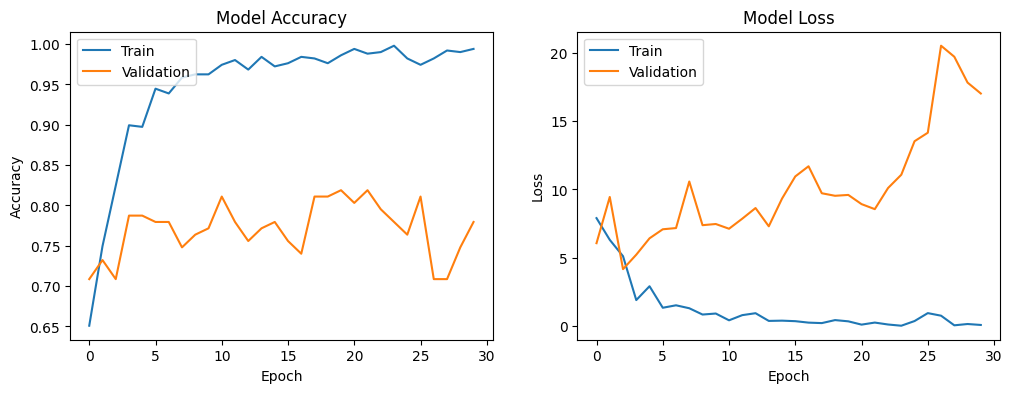

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block2_out_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Explicitly print the accuracy

# Optional: Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### RANDOM FOREST RESNET CONV5_BLOCK2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
# output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block2_out_features_with_labels.csv'
# df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Test Accuracy: 0.7862


### RESNET CONV5_BLOCK1

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the ResNet50 model with pre-trained weights, without the fully connected layers
model = ResNet50(weights='imagenet', include_top=False)

# Specify the layer from which to extract features (recommended: 'conv4_block6_out')
layer_name = 'conv5_block1_out'  # This layer has output shape (14, 14, 1024) for better memory handling
resnet_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Define the paths to the image folders
malignant_images_folder = '/content/drive/MyDrive/skin_cancer_images/malignant_images'
benign_images_folder = '/content/drive/MyDrive/skin_cancer_images/benign_images_400'

# Function to load and preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    return preprocess_input(img_data)

# Get a list of image paths for malignant (393) and benign (400) images
malignant_image_paths = [os.path.join(malignant_images_folder, fname) for fname in os.listdir(malignant_images_folder)[:393]]
benign_image_paths = [os.path.join(benign_images_folder, fname) for fname in os.listdir(benign_images_folder)[:400]]

# Combine the lists and create corresponding labels (1 for malignant, 0 for benign)
all_image_paths = malignant_image_paths + benign_image_paths
labels = [1] * len(malignant_image_paths) + [0] * len(benign_image_paths)

# Create an empty list to store the flattened features and their labels
flattened_features = []

# Process each image, extract the output of the specified layer, flatten, and store features with labels
for img_path, label in zip(all_image_paths, labels):
    img_data = preprocess_image(img_path)  # Preprocess the image
    resnet_layer_features = resnet_layer_model.predict(img_data)  # Get the specified layer features

    # Flatten the feature map to 1D
    flattened_feature = resnet_layer_features.flatten()

    # Append the flattened features along with the label to the list
    flattened_features.append(np.append(flattened_feature, label))

# Convert the list of features and labels to a Pandas DataFrame
feature_columns = [f'feature_{i}' for i in range(len(flattened_features[0]) - 1)]  # Feature column names
df = pd.DataFrame(flattened_features, columns=feature_columns + ['label'])

# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block1_out_features_with_labels.csv'
df.to_csv(output_file_path, index=False)

print(f"Extracted features and labels saved to {output_file_path}")


Mounted at /content/drive
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

### SVM RESNET CONV5_BLOCK1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block1_out_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
[[73 11]
 [25 50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        84
         1.0       0.82      0.67      0.74        75

    accuracy                           0.77       159
   macro avg       0.78      0.77      0.77       159
weighted avg       0.78      0.77      0.77       159

Accuracy: 0.7736


### NEURAL NETWORK RESNET CONV5_BLOCK1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6248 - loss: 4.8554 - val_accuracy: 0.7559 - val_loss: 6.2726
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7878 - loss: 6.9303 - val_accuracy: 0.7402 - val_loss: 8.2645
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8849 - loss: 3.1687 - val_accuracy: 0.7874 - val_loss: 7.7163
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8813 - loss: 3.2099 - val_accuracy: 0.7559 - val_loss: 9.1881
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9135 - loss: 2.4122 - val_accuracy: 0.8031 - val_loss: 7.7700
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9368 - loss: 1.7115 - val_accuracy: 0.8110 - val_loss: 8.3498
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9547 - loss: 1.3629 - val_accuracy: 0.7244 - val_loss: 10.3175
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9402 - loss: 2.7289 - val_accuracy: 0.8268 - val_loss

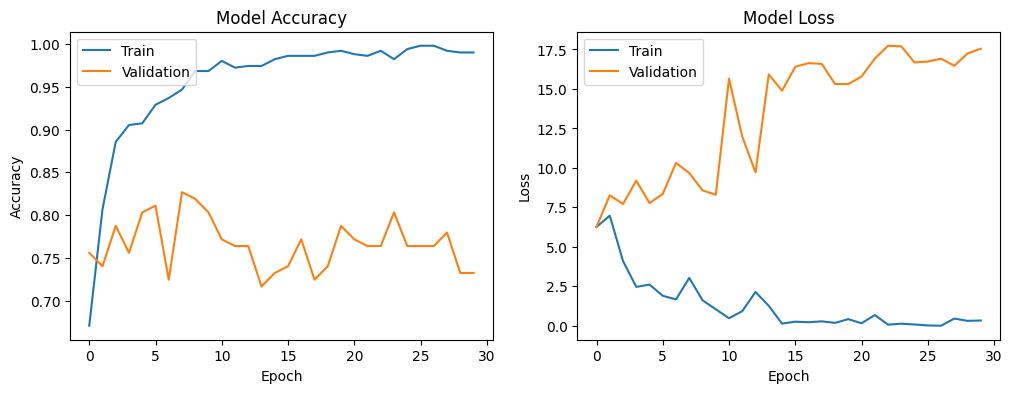

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block1_out_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Explicitly print the accuracy

# Optional: Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### RANDOM FOREST RESNET CONV5_BLOCK1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the extracted features and labels
output_file_path = '/content/drive/MyDrive/skin_cancer/resnet50_conv5_block1_out_features_with_labels.csv'
df = pd.read_csv(output_file_path)

# Split the features and labels
X = df.drop(columns=['label'])  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Test Accuracy: 0.7610


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# List of CSV files to process
csv_files = [
    '/content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv'

]

# Loop through each file and process it
for file_path in csv_files:
    print(f"\nProcessing file: {file_path}\n")

    # Load the extracted features and labels
    df = pd.read_csv(file_path)

    # Split the features and labels
    X = df.drop(columns=['label'])  # Features
    y = df['label']  # Labels

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel if needed
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate the model
    print(f"Results for file: {file_path}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for file {file_path}: {accuracy:.4f}")  # Print accuracy with 4 decimal places


Mounted at /content/drive

Processing file: /content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv

Results for file: /content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv
Confusion Matrix:
[[75  9]
 [28 47]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.89      0.80        84
         1.0       0.84      0.63      0.72        75

    accuracy                           0.77       159
   macro avg       0.78      0.76      0.76       159
weighted avg       0.78      0.77      0.76       159

Accuracy for file /content/drive/MyDrive/skin_cancer/vgg16_block5_conv2_features_with_labels.csv: 0.7673
